In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/DOS ALVARENGA Conflito de Programas.dxf', encoding='ANSI_1252')

In [3]:
bairro = 'DOS-ALVARENGA'

In [4]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [5]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [6]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,MCT - RUA NORA ASTORGA,None,AcDbEntity:AcDbPolyline,Continuous,2BA,None,"LINESTRING (336445.559 7371474.015, 336471.302..."
1,RUA GREGÃRIO DE MATOS - 11_12_20 - DJI_0011,None,AcDbEntity:AcDbPolyline,Continuous,2BB,None,"LINESTRING (336584.045 7371963.768, 336610.736..."
2,RUA MARGARIDA MARIA ALVES - 09_12_20 - DJI_0049,None,AcDbEntity:AcDbPolyline,Continuous,2BC,None,"LINESTRING (336538.005 7371732.806, 336541.148..."
3,MCT - RUA DOS CAÃADORES,None,AcDbEntity:AcDbPolyline,Continuous,2BD,None,"LINESTRING (336366.497 7371510.572, 336393.968..."
4,MCT - RUA SÃO CRISTÃVÃO,None,AcDbEntity:AcDbPolyline,Continuous,2BE,None,"LINESTRING (336453.987 7371810.033, 336500.386..."
5,MCT - RUA MARIA DA PENHA N. E SILVA,None,AcDbEntity:AcDbPolyline,Continuous,2BF,None,"LINESTRING (336438.351 7371961.754, 336515.198..."
6,MCT - RUA CORONEL BONIFÃCIO CARVALHO,None,AcDbEntity:AcDbPolyline,Continuous,2C0,None,"LINESTRING (336390.997 7371920.366, 336478.631..."
7,RUA GUANAMBY - 11_12_20 - DJI_0013,None,AcDbEntity:AcDbPolyline,Continuous,2C1,None,"LINESTRING (336383.050 7371850.472, 336448.338..."
8,MCT - VIELA 4,None,AcDbEntity:AcDbPolyline,Continuous,2C2,None,"LINESTRING (336610.182 7371836.608, 336669.854..."
9,RUA BENEDITO SERAFIM BUENO - 12_12_20 - PASTA ...,None,AcDbEntity:AcDbPolyline,Continuous,2C3,None,"LINESTRING (337679.634 7374524.189, 337692.308..."


In [7]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [8]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

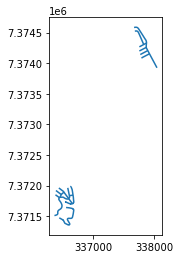

In [9]:
gdf_dxf.plot()

In [10]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('!', '1')

In [11]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [12]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [13]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('DJI_[0-9]{4}')

In [14]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [15]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [16]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [17]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer'].to_list()

[' RUA NORA ASTORGA',
 ' RUA DOS CAÇADORES',
 ' RUA SÃO CRISTÓVÃO',
 ' RUA MARIA DA PENHA N. E SILVA',
 ' RUA CORONEL BONIFÁCIO CARVALHO',
 ' VIELA 4',
 ' RUA PARAGUAÇU',
 ' RUA PASQUALE SCARANO']

In [18]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)

,0,1,2,3,4,5,6
0,RUA NORA ASTORGA,None,None,None,None,None,None
1,RUA GREGÓRIO DE MATOS -,11_12_20,None,-,None,DJI_0011,
2,RUA MARGARIDA MARIA ALVES -,09_12_20,None,-,None,DJI_0049,
3,RUA DOS CAÇADORES,None,None,None,None,None,None
4,RUA SÃO CRISTÓVÃO,None,None,None,None,None,None
5,RUA MARIA DA PENHA N. E SILVA,None,None,None,None,None,None
6,RUA CORONEL BONIFÁCIO CARVALHO,None,None,None,None,None,None
7,RUA GUANAMBY -,11_12_20,None,-,None,DJI_0013,
8,VIELA 4,None,None,None,None,None,None
9,RUA BENEDITO SERAFIM BUENO -,12_12_20,None,- PASTA ETAPA 01 -,None,DJI_0055,


In [21]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].unique().tolist()

[None, ' - ', ' - PASTA ETAPA 01 - ']

In [22]:
etapas = {
    ' - PASTA ETAPA 04 - ':'etapa_04', 
    ' - ':'etapa_00', 
    '  - PASTA ETAPA 02 - ':'etapa_02',
    ' - PASTA ETAPA 02 - ':'etapa_02', 
    '  - PASTA ETAPA 01 - ':'etapa_01',
    ' - PASTA ETAPA 01 - ':'etapa_01', 
    ' -PASTA ETAPA 03 - ':'etapa_03',
    '':'etapa_00',
    ' - PASTA ETAPA 03 - ':'etapa_03', 
    ' - PASTA ETAPA 02 -':'etapa_02', 
    ' - ETAPA 03 - ':'etapa_03',
    '- PASTA ETAPA 03 - ':'etapa_03', 
    ' - PASTA ETAPA 01 -':'etapa_01',
    ' -  PASTA ETAPA 01 - ':'etapa_01', 
    '21 - Mavic - ':'etapa_00', 
    '21 - Mavic -  ':'etapa_00',
    '21 - Phantom - ':'etapa_00', 
    ' -PASTA ETAPA 01 - ':'etapa_01', 
    ' PASTA ETAPA 04':'etapa_04',
    '  - PASTA ETAPA 04 - ':'etapa_04', 
    '- PASTA ETAPA 04 -':'etapa_04',
    ' - PASTA ETAPA 04 -':'etapa_04'
}

In [23]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

0          NaN
1     etapa_00
2     etapa_00
3          NaN
4          NaN
5          NaN
6          NaN
7     etapa_00
8          NaN
9     etapa_01
10         NaN
11    etapa_01
12    etapa_01
13    etapa_01
14         NaN
Name: 3, dtype: object

In [24]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(DJI_[0-9]{4})', expand=True)[3].map(etapas)

In [25]:
gdf_dxf.loc[:, 'etapa']

0          NaN
1     etapa_00
2     etapa_00
3          NaN
4          NaN
5          NaN
6          NaN
7     etapa_00
8          NaN
9     etapa_01
10         NaN
11    etapa_01
12    etapa_01
13    etapa_01
14         NaN
Name: etapa, dtype: object

In [26]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,RUA NORA ASTORGA,None,AcDbEntity:AcDbPolyline,Continuous,2BA,None,"LINESTRING (336445.559 7371474.015, 336471.302...",[ RUA NORA ASTORGA],[],NaN,RUA NORA ASTORGA,NaN
1,RUA GREGÓRIO DE MATOS - 11_12_20 - DJI_0011,None,AcDbEntity:AcDbPolyline,Continuous,2BB,None,"LINESTRING (336584.045 7371963.768, 336610.736...","[RUA GREGÓRIO DE MATOS, 11_12_20, DJI_0011]",[DJI_0011],11_12_20,RUA GREGÓRIO DE MATOS,etapa_00
2,RUA MARGARIDA MARIA ALVES - 09_12_20 - DJI_0049,None,AcDbEntity:AcDbPolyline,Continuous,2BC,None,"LINESTRING (336538.005 7371732.806, 336541.148...","[RUA MARGARIDA MARIA ALVES, 09_12_20, DJI_0049]",[DJI_0049],09_12_20,RUA MARGARIDA MARIA ALVES,etapa_00
3,RUA DOS CAÇADORES,None,AcDbEntity:AcDbPolyline,Continuous,2BD,None,"LINESTRING (336366.497 7371510.572, 336393.968...",[ RUA DOS CAÇADORES],[],NaN,RUA DOS CAÇADORES,NaN
4,RUA SÃO CRISTÓVÃO,None,AcDbEntity:AcDbPolyline,Continuous,2BE,None,"LINESTRING (336453.987 7371810.033, 336500.386...",[ RUA SÃO CRISTÓVÃO],[],NaN,RUA SÃO CRISTÓVÃO,NaN
5,RUA MARIA DA PENHA N. E SILVA,None,AcDbEntity:AcDbPolyline,Continuous,2BF,None,"LINESTRING (336438.351 7371961.754, 336515.198...",[ RUA MARIA DA PENHA N. E SILVA],[],NaN,RUA MARIA DA PENHA N. E SILVA,NaN
6,RUA CORONEL BONIFÁCIO CARVALHO,None,AcDbEntity:AcDbPolyline,Continuous,2C0,None,"LINESTRING (336390.997 7371920.366, 336478.631...",[ RUA CORONEL BONIFÁCIO CARVALHO],[],NaN,RUA CORONEL BONIFÁCIO CARVALHO,NaN
7,RUA GUANAMBY - 11_12_20 - DJI_0013,None,AcDbEntity:AcDbPolyline,Continuous,2C1,None,"LINESTRING (336383.050 7371850.472, 336448.338...","[RUA GUANAMBY, 11_12_20, DJI_0013]",[DJI_0013],11_12_20,RUA GUANAMBY,etapa_00
8,VIELA 4,None,AcDbEntity:AcDbPolyline,Continuous,2C2,None,"LINESTRING (336610.182 7371836.608, 336669.854...",[ VIELA 4],[],NaN,VIELA 4,NaN
9,RUA BENEDITO SERAFIM BUENO - 12_12_20 - PASTA ...,None,AcDbEntity:AcDbPolyline,Continuous,2C3,None,"LINESTRING (337679.634 7374524.189, 337692.308...","[RUA BENEDITO SERAFIM BUENO, 12_12_20, PASTA E...",[DJI_0055],12_12_20,RUA BENEDITO SERAFIM BUENO,etapa_01


In [27]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [28]:
pd_videos

,Video_0
0,None
1,DJI_0011.MOV
2,DJI_0049.MOV
3,None
4,None
5,None
6,None
7,DJI_0013.MOV
8,None
9,DJI_0055.MOV


In [29]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [30]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0'],
      dtype='object')

In [31]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [32]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [33]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [34]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [35]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.data_voo + gdf_dxf.etapa + gdf_dxf[c]

In [36]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [37]:
gdf_dxf.crs = 'epsg:31983'

In [38]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_0_path
0,RUA CORONEL BONIFÁCIO CARVALHO,"LINESTRING (336390.997 7371920.366, 336478.631...",None,AcDbEntity:AcDbPolyline,Continuous,2C0,None,[ RUA CORONEL BONIFÁCIO CARVALHO],[],None,RUA CORONEL BONIFÁCIO CARVALHO,,None,None
1,RUA DOS CAÇADORES,"LINESTRING (336366.497 7371510.572, 336393.968...",None,AcDbEntity:AcDbPolyline,Continuous,2BD,None,[ RUA DOS CAÇADORES],[],None,RUA DOS CAÇADORES,,None,None
2,RUA MARIA DA PENHA N. E SILVA,"LINESTRING (336438.351 7371961.754, 336515.198...",None,AcDbEntity:AcDbPolyline,Continuous,2BF,None,[ RUA MARIA DA PENHA N. E SILVA],[],None,RUA MARIA DA PENHA N. E SILVA,,None,None
3,RUA NORA ASTORGA,"LINESTRING (336445.559 7371474.015, 336471.302...",None,AcDbEntity:AcDbPolyline,Continuous,2BA,None,[ RUA NORA ASTORGA],[],None,RUA NORA ASTORGA,,None,None
4,RUA PARAGUAÇU,"LINESTRING (337666.967 7374583.589, 337675.521...",None,AcDbEntity:AcDbPolyline,Continuous,2C4,None,[ RUA PARAGUAÇU],[],None,RUA PARAGUAÇU,,None,None
5,RUA PASQUALE SCARANO,"LINESTRING (337753.229 7374267.099, 337769.858...",None,AcDbEntity:AcDbPolyline,Continuous,2C8,None,[ RUA PASQUALE SCARANO],[],None,RUA PASQUALE SCARANO,,None,None
6,RUA SÃO CRISTÓVÃO,"LINESTRING (336453.987 7371810.033, 336500.386...",None,AcDbEntity:AcDbPolyline,Continuous,2BE,None,[ RUA SÃO CRISTÓVÃO],[],None,RUA SÃO CRISTÓVÃO,,None,None
7,VIELA 4,"LINESTRING (336610.182 7371836.608, 336669.854...",None,AcDbEntity:AcDbPolyline,Continuous,2C2,None,[ VIELA 4],[],None,VIELA 4,,None,None
8,RUA BENEDITO SERAFIM BUENO - 12_12_20 - PASTA ...,"LINESTRING (337679.634 7374524.189, 337692.308...",None,AcDbEntity:AcDbPolyline,Continuous,2C3,None,"[RUA BENEDITO SERAFIM BUENO, 12_12_20, PASTA E...",[DJI_0055],12_12_20/,RUA BENEDITO SERAFIM BUENO,etapa_01/,DJI_0055.MOV,videos/dos_alvarenga/12_12_20/etapa_01/DJI_005...
9,RUA EDGARD DE SOUZA - 12_12_20 - PASTA ETAPA 0...,"LINESTRING (337787.743 7374082.512, 337806.104...",None,AcDbEntity:AcDbPolyline,Continuous,2C7,None,"[RUA EDGARD DE SOUZA, 12_12_20, PASTA ETAPA 01...",[DJI_0059],12_12_20/,RUA EDGARD DE SOUZA,etapa_01/,DJI_0059.MOV,videos/dos_alvarenga/12_12_20/etapa_01/DJI_005...


In [39]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_0_path
0,"LINESTRING (336390.997 7371920.366, 336478.631...",None,RUA CORONEL BONIFÁCIO CARVALHO,,None,None
1,"LINESTRING (336366.497 7371510.572, 336393.968...",None,RUA DOS CAÇADORES,,None,None
2,"LINESTRING (336438.351 7371961.754, 336515.198...",None,RUA MARIA DA PENHA N. E SILVA,,None,None
3,"LINESTRING (336445.559 7371474.015, 336471.302...",None,RUA NORA ASTORGA,,None,None
4,"LINESTRING (337666.967 7374583.589, 337675.521...",None,RUA PARAGUAÇU,,None,None
5,"LINESTRING (337753.229 7374267.099, 337769.858...",None,RUA PASQUALE SCARANO,,None,None
6,"LINESTRING (336453.987 7371810.033, 336500.386...",None,RUA SÃO CRISTÓVÃO,,None,None
7,"LINESTRING (336610.182 7371836.608, 336669.854...",None,VIELA 4,,None,None
8,"LINESTRING (337679.634 7374524.189, 337692.308...",12_12_20/,RUA BENEDITO SERAFIM BUENO,etapa_01/,DJI_0055.MOV,videos/dos_alvarenga/12_12_20/etapa_01/DJI_005...
9,"LINESTRING (337787.743 7374082.512, 337806.104...",12_12_20/,RUA EDGARD DE SOUZA,etapa_01/,DJI_0059.MOV,videos/dos_alvarenga/12_12_20/etapa_01/DJI_005...


In [42]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB-Conflito-de-programas.gpkg', driver='GPKG')

In [46]:
gdf_dxf.to_crs('EPSG:4326').drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB-Conflito-de-programas.geojson', driver='GeoJSON')

In [41]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_0_path      object
dtype: object